# ***Bella Beat Fitness Tracker Case Study***
by Joel Gracelin

# **Introduction**


Bellabeat is a women’s wellness brand focusing on smart devices. The ultimate goal of Bellabeat is to provide insight on women’s bodies in order to empower them and to help them focus more on their wellbeing. 
Bellabeat provides precision tracking of menstural cycle, reproductive health and sleep, calories and many more 
It should be noted that this case study is done using the data collected from a competing product to see how Bellabeat can establish itself in the smart wearable industry. 
This case study will follow the six phases of data analysis framework 


# **Ask**

**Business Task** 
To analyse data from a competitive fitness tracker (fitbit) to gain meaningful insights which will help Bellabeat to become a big player in the fitness tracker industry. 

***Key stake holders ***

•	Urška Sršen – Bellabeat’s cofounder and Chief Creative Officer

•	Sando Mur – Bellabeat’s cofounder and key member of the Bellabeat executive team

•	Bellabeat marketing analytics team


# **Preparing the Data** 

***Dataset***: 
The dataset used for this case study is ‘FitBit Fitness Tracker Data’. The data set is made available through Mobius. The dataset is open-source and is stored in Kaggle 

***Integrity of the data*** 
The limited number of participants (30) and the limited time period for data collection (1 month) does not represent the wider demographic.
The data is collected April between 12th, 2016 and May 12th, 2016. meaning that the data is not current and may not be an indicative of the current trends. 


# **Processing the Data** 


The data will be analysed using R programming.


The first step of the analysis process is to load the required libraries.

In [1]:
library(tidyverse)
library(readr)
library(janitor)
library(tidyr)
library(lubridate)
library(ggplot2)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




After loading the libraries,we can load the dataframes. For this case study only six out of eighteen dataframes are chosen. 


In [2]:
dailyactivity<- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleepday <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
dailyintensity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
dailysteps <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
dailycalories <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
weight<-read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...

ℹ Use `spec()` to retrieve the full column spec

The next step is to check for duplicates since duplicate data may skew the results.

In [3]:
sum(duplicated(dailyactivity))
sum(duplicated(sleepday))
sum(duplicated(dailysteps))
sum(duplicated(dailyintensity))
sum(duplicated(dailycalories))
sum(duplicated(weight))


[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

[1] 0

In [4]:
sleepday<-sleepday%>%distinct()%>% drop_na()
sum(duplicated(sleepday))


[1] 0

Once the duplicates are removed we can then change the column names to lowercase for ease of use 

In [5]:
colnames(dailyactivity)<-tolower(colnames(dailyactivity))
colnames(sleepday)<-tolower(colnames(sleepday))
colnames(dailysteps)<-tolower(colnames(dailysteps))
colnames(dailyintensity)<-tolower(colnames(dailyintensity))
colnames(dailycalories)<-tolower(colnames(dailycalories))
colnames(weight)<-tolower(colnames(weight))

To get a brief idea on the structure of each dataframe we can use the summary() function to summarize the data frame 

In [6]:

summary(dailyactivity)
summary(sleepday)
summary(dailyintensity)
summary(dailysteps)
summary(dailycalories)
summary(weight)


       id            activitydate         totalsteps    totaldistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 trackerdistance  loggedactivitiesdistance veryactivedistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 moderatelyactivedistance lightactivedistance sedentary

       id              sleepday         totalsleeprecords totalminutesasleep
 Min.   :1.504e+09   Length:410         Min.   :1.00      Min.   : 58.0     
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.00      1st Qu.:361.0     
 Median :4.703e+09   Mode  :character   Median :1.00      Median :432.5     
 Mean   :4.995e+09                      Mean   :1.12      Mean   :419.2     
 3rd Qu.:6.962e+09                      3rd Qu.:1.00      3rd Qu.:490.0     
 Max.   :8.792e+09                      Max.   :3.00      Max.   :796.0     
 totaltimeinbed 
 Min.   : 61.0  
 1st Qu.:403.8  
 Median :463.0  
 Mean   :458.5  
 3rd Qu.:526.0  
 Max.   :961.0  

       id            activityday        sedentaryminutes lightlyactiveminutes
 Min.   :1.504e+09   Length:940         Min.   :   0.0   Min.   :  0.0       
 1st Qu.:2.320e+09   Class :character   1st Qu.: 729.8   1st Qu.:127.0       
 Median :4.445e+09   Mode  :character   Median :1057.5   Median :199.0       
 Mean   :4.855e+09                      Mean   : 991.2   Mean   :192.8       
 3rd Qu.:6.962e+09                      3rd Qu.:1229.5   3rd Qu.:264.0       
 Max.   :8.878e+09                      Max.   :1440.0   Max.   :518.0       
 fairlyactiveminutes veryactiveminutes sedentaryactivedistance
 Min.   :  0.00      Min.   :  0.00    Min.   :0.000000       
 1st Qu.:  0.00      1st Qu.:  0.00    1st Qu.:0.000000       
 Median :  6.00      Median :  4.00    Median :0.000000       
 Mean   : 13.56      Mean   : 21.16    Mean   :0.001606       
 3rd Qu.: 19.00      3rd Qu.: 32.00    3rd Qu.:0.000000       
 Max.   :143.00      Max.   :210.00    Max.   :0.110000       
 lightactived

       id            activityday          steptotal    
 Min.   :1.504e+09   Length:940         Min.   :    0  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790  
 Median :4.445e+09   Mode  :character   Median : 7406  
 Mean   :4.855e+09                      Mean   : 7638  
 3rd Qu.:6.962e+09                      3rd Qu.:10727  
 Max.   :8.878e+09                      Max.   :36019  

       id            activityday           calories   
 Min.   :1.504e+09   Length:940         Min.   :   0  
 1st Qu.:2.320e+09   Class :character   1st Qu.:1828  
 Median :4.445e+09   Mode  :character   Median :2134  
 Mean   :4.855e+09                      Mean   :2304  
 3rd Qu.:6.962e+09                      3rd Qu.:2793  
 Max.   :8.878e+09                      Max.   :4900  

       id                date              weightkg       weightpounds  
 Min.   :1.504e+09   Length:67          Min.   : 52.60   Min.   :116.0  
 1st Qu.:6.962e+09   Class :character   1st Qu.: 61.40   1st Qu.:135.4  
 Median :6.962e+09   Mode  :character   Median : 62.50   Median :137.8  
 Mean   :7.009e+09                      Mean   : 72.04   Mean   :158.8  
 3rd Qu.:8.878e+09                      3rd Qu.: 85.05   3rd Qu.:187.5  
 Max.   :8.878e+09                      Max.   :133.50   Max.   :294.3  
                                                                        
      fat             bmi        ismanualreport      logid          
 Min.   :22.00   Min.   :21.45   Mode :logical   Min.   :1.460e+12  
 1st Qu.:22.75   1st Qu.:23.96   FALSE:26        1st Qu.:1.461e+12  
 Median :23.50   Median :24.39   TRUE :41        Median :1.462e+12  
 Mean   :23.50   Mean   :25.19                   Mean   :1.462e+12  
 3rd Qu.:24.25   3rd Qu.:25.56                   3rd Qu.:1.462e+12  
 M

We can then change the 'date' column to a standard "m/d/y" format using as.Date() function 

In [7]:
dailyactivity$activitydate<-as.Date(dailyactivity$activitydate, "%m/%d/%Y")
sleepday$sleepday<-as.Date(sleepday$sleepday, "%m/%d/%Y")
dailysteps$activityday<-as.Date(dailysteps$activityday, "%m/%d/%Y")
dailyintensity$activityday<-as.Date(dailyintensity$activityday, "%m/%d/%Y")
dailycalories$activityday<-as.Date(dailycalories$activityday, "%m/%d/%Y")
weight$date<-as.Date(weight$date,"%m/%d/%Y")

We can then proceed to rename the date column in every data frame to "date" for consistency and ease of use.

In [8]:
dailyactivity<-dailyactivity%>% rename(date=activitydate)
sleepday<-sleepday%>% rename(date=sleepday)
dailysteps<-dailysteps%>% rename(date=activityday)
dailyintensity<-dailyintensity%>% rename(date=activityday)
dailycalories<-dailycalories%>% rename(date=activityday)

The data can be then merged for analysis 

In [9]:
intensity_sleep<-merge(dailyintensity,sleepday,by=c("id","date"))

weight_steps<-merge(weight,dailysteps,by=c("id"))

calories_weight<-merge(dailycalories,weight,by=c("id"))

steps_calories<-merge(dailysteps,dailycalories,by=c("id","date"))

step_caloriesweight<-merge(steps_calories,weight,by=c("id"))


str(weight_steps)
str(intensity_sleep)
str(calories_weight)
str(steps_calories)
str(step_caloriesweight)

'data.frame':	2076 obs. of  10 variables:
 $ id            : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date.x        : Date, format: "2016-05-02" "2016-05-02" ...
 $ weightkg      : num  52.6 52.6 52.6 52.6 52.6 ...
 $ weightpounds  : num  116 116 116 116 116 ...
 $ fat           : num  22 22 22 22 22 22 22 22 22 22 ...
 $ bmi           : num  22.6 22.6 22.6 22.6 22.6 ...
 $ ismanualreport: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ logid         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...
 $ date.y        : Date, format: "2016-04-16" "2016-04-18" ...
 $ steptotal     : num  12669 13019 9762 10060 9705 ...
'data.frame':	410 obs. of  13 variables:
 $ id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date                    : Date, format: "2016-04-12" "2016-04-13" ...
 $ sedentaryminutes        : num  728 776 726 773 539 775 818 838 732 709 ...
 $ lightlyactiveminutes    : num  328 217 209 221 164 264 205 211 262 238 ...
 $ fairlyactivem

# **Analyzing and share**

once the data is cleaned we can use ggplot2() to visualize the data to analyze it effeciently.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


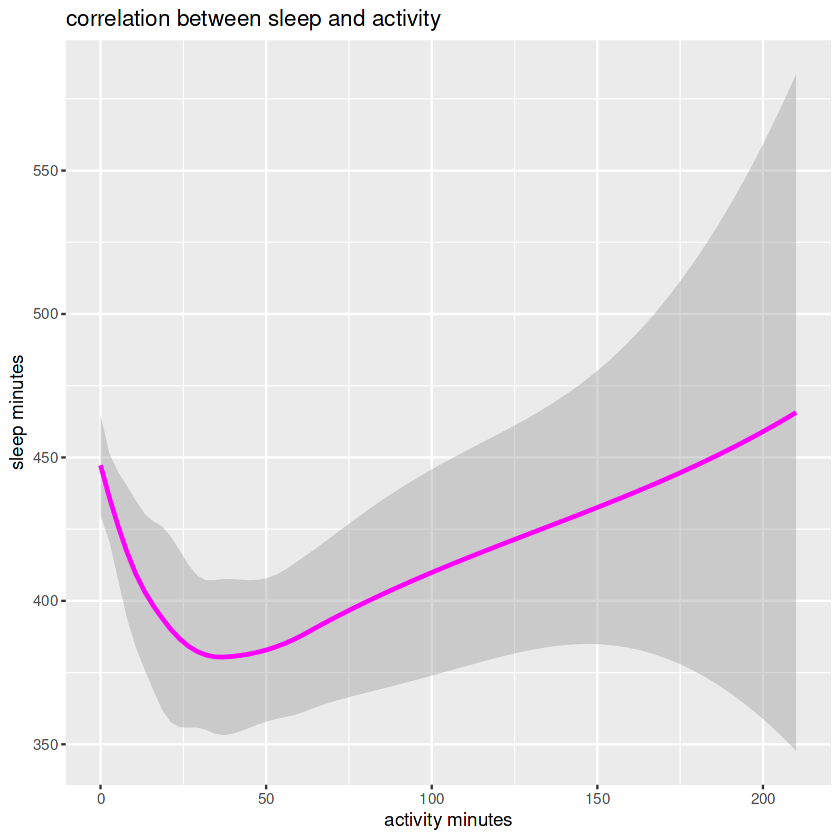

$x
[1] "weight in kg"

$y
[1] "total steps"

$title
[1] "correlation between steps and weight"

attr(,"class")
[1] "labels"

`geom_smooth()` using formula = 'y ~ x'


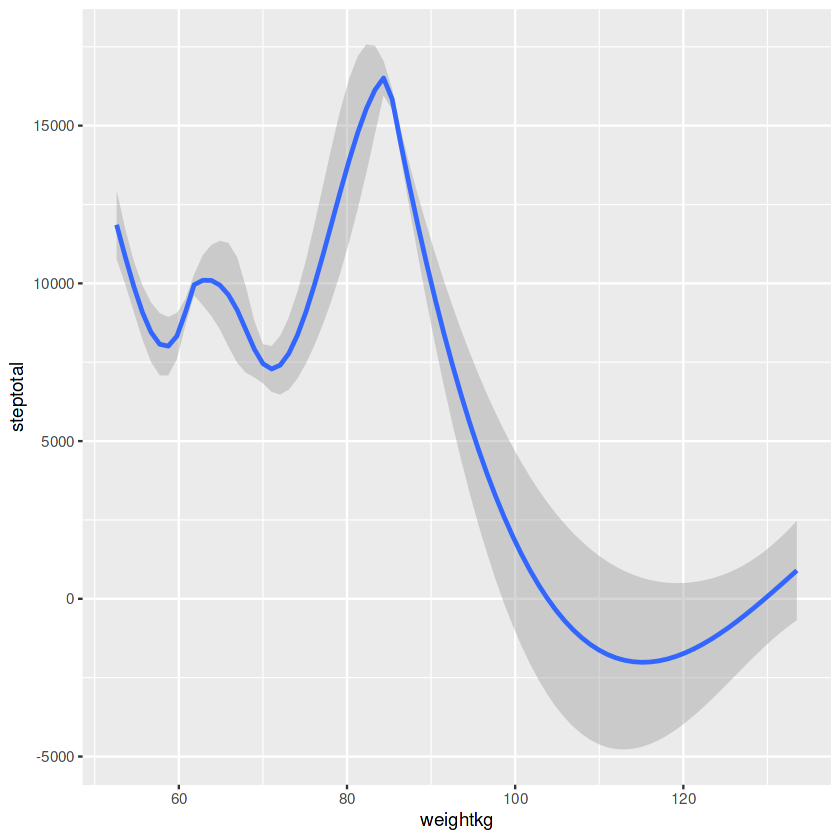

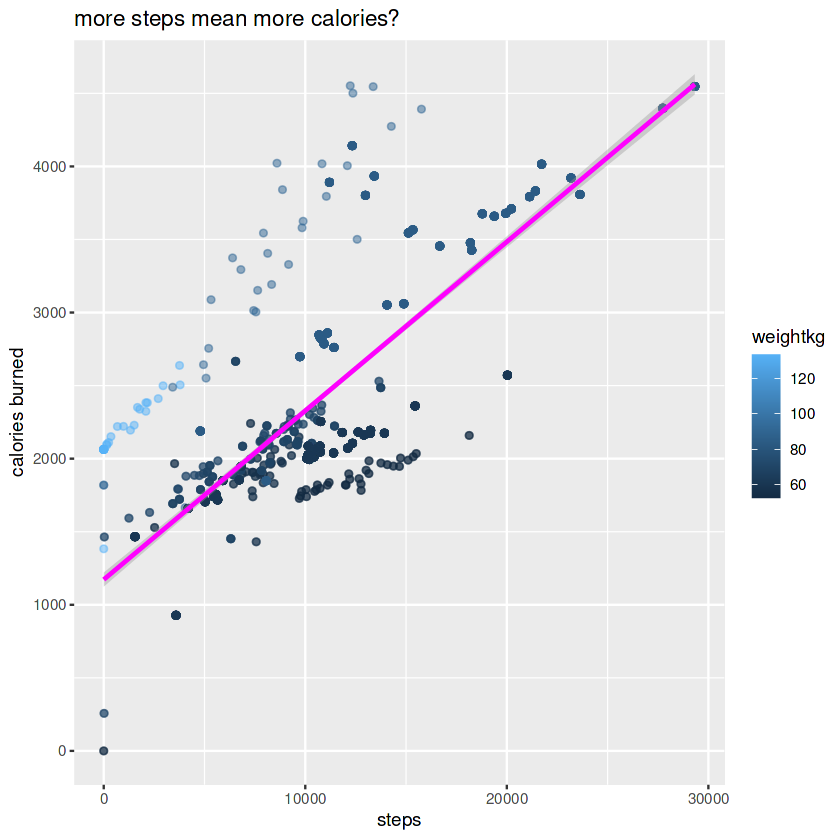

In [10]:
ggplot(intensity_sleep,aes(x=veryactiveminutes,y=totalminutesasleep))+
geom_smooth(color='magenta')+
labs(title="correlation between sleep and activity",
    x="activity minutes",
    y="sleep minutes")


ggplot(weight_steps,aes(x=weightkg,y=steptotal,color=weightkg))+
geom_smooth(method="auto",)
labs(title="correlation between steps and weight",
    x='weight in kg',
    y='total steps')




ggplot(step_caloriesweight,aes(x=steptotal,y=calories,color=weightkg))+
geom_point(alpha=0.5)+stat_smooth(method = "lm",color='magenta',se = TRUE)+
labs(title='more steps mean more calories?',
    x='steps',
    y='calories burned')

# **Act**

The above visualizations give us some interesting insights on the data. 
it must be noted that, the limited number of participants make it harder to generalize any results.

**correlation between sleep and activity**
The correlation between sleep and activity shows that high intense activity for a prolonged time can result in better sleep.

**correlation between steps and weight**
The second visualization reveals that people who are on the heavier side of the weight spectrum tend to walk less and have lower total steps.

**more steps mean more calories?**
The 'more steps mean more calories?' visualization proves that more steps actually correlates to more calories. 

# **How Bellabeat can benefit from this?**
Here are few things the Bellabeat marketing team and stakeholders make use of:

-Though the dataset does not talk about the quality of the sleep, it is evident that high intensity activities promote sleep. Bellabeat, through their app can encourage their users with poor sleep to do more high intensity activities for a better sleep. 

-Through the analysis it can be observed that heavier people tend to walk less. Bellabeat can promote their heavier users to walk more promoting a healthy activity. 

-The analysis shows that more calories can be burnt by taking more steps. The results also show that people on the heavier side burn less calories because of their lower step count. 
Bellabeat can create a personalized programme in their 'Bellabeat' app that encourages its users to actively take part in high intensity activities which would in turn, help their user live a healthy life while simultaneously increasing their use of Bellabeat products to achieve thier fitness goals.


